In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

In [13]:
def unemployment_rate_graph(country, sex, age_range, adjusted_bool, unit_measure):

    df= pd.read_csv('UNEMPLOYMENT RATES FOR EUROPE.csv')
    df = df[df['geo'] == country] # ορίζουμε την χ΄ώρα, περνάμε ως όρισμα το EL για την Ελλάδα
    df = df[df['sex'] == sex] # ορίζουμε το φύλο,  T και για τα δύο, M για άνδρες, F για γυναίκες
    df = df[df['age'] == age_range] # ορίζουμε το ηλιακιακό εύρος. 'TOTAL' για όλους, 'Y_LT25' για κάτω των 25, 
                                    # 'Υ25-74' για άτομα από 25 έως 74
    df = df[df['s_adj'] == adjusted_bool] # κατηγοροποιούμε τα δεδομένα ως Unadjusted ('NSA') 
                                          # ή ως Seasonally adjusted ('SA') ή ως Trend cycle data ('TC')
    df = df[df['unit'] == unit_measure] # θέτουμε 'PC_ACT' για προβολή των ανέργων ως ποσοστό του ολικού πληθυσμού,
                                        # ή θέτουμε 'THS_PER' για προβολή των ανέργων ως χιλιάδες άτομα
    df.reset_index(inplace=True)
    df.drop(['index','s_adj', 'DATAFLOW', 'LAST UPDATE', 'freq', 's_adj', 'unit', 'geo', 'OBS_FLAG', 'age', 'sex'], inplace=True, axis=1)
    df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
    df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
    df['time'] =  pd.to_datetime(df['time'], format='%Y%m', errors='ignore', infer_datetime_format=True)
    df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)
    print(df)
    rcParams['figure.figsize'] = 20, 12
    df.plot(x = 'time', y = 'value')
    plt.xlabel('Date')
    if (unit_measure == 'PC_ACT'):
        plt.ylabel('Unemployment percentage')
    else :
        plt.ylabel('Thousand persons')
    plt.title("Monthly value of Unemployment rate")
    
    fig = px.line(df, x="time", y="value", title="Monthly value of Unemployment rate")
    fig.update_traces(mode="markers+lines")
    fig.show()

          time  value
0   1998-04-01   10.9
1   1998-05-01   11.0
2   1998-06-01   10.9
3   1998-07-01   11.0
4   1998-08-01   11.2
..         ...    ...
287 2022-03-01   12.8
288 2022-04-01   12.5
289 2022-05-01   12.5
290 2022-06-01   12.3
291 2022-07-01   11.4

[292 rows x 2 columns]


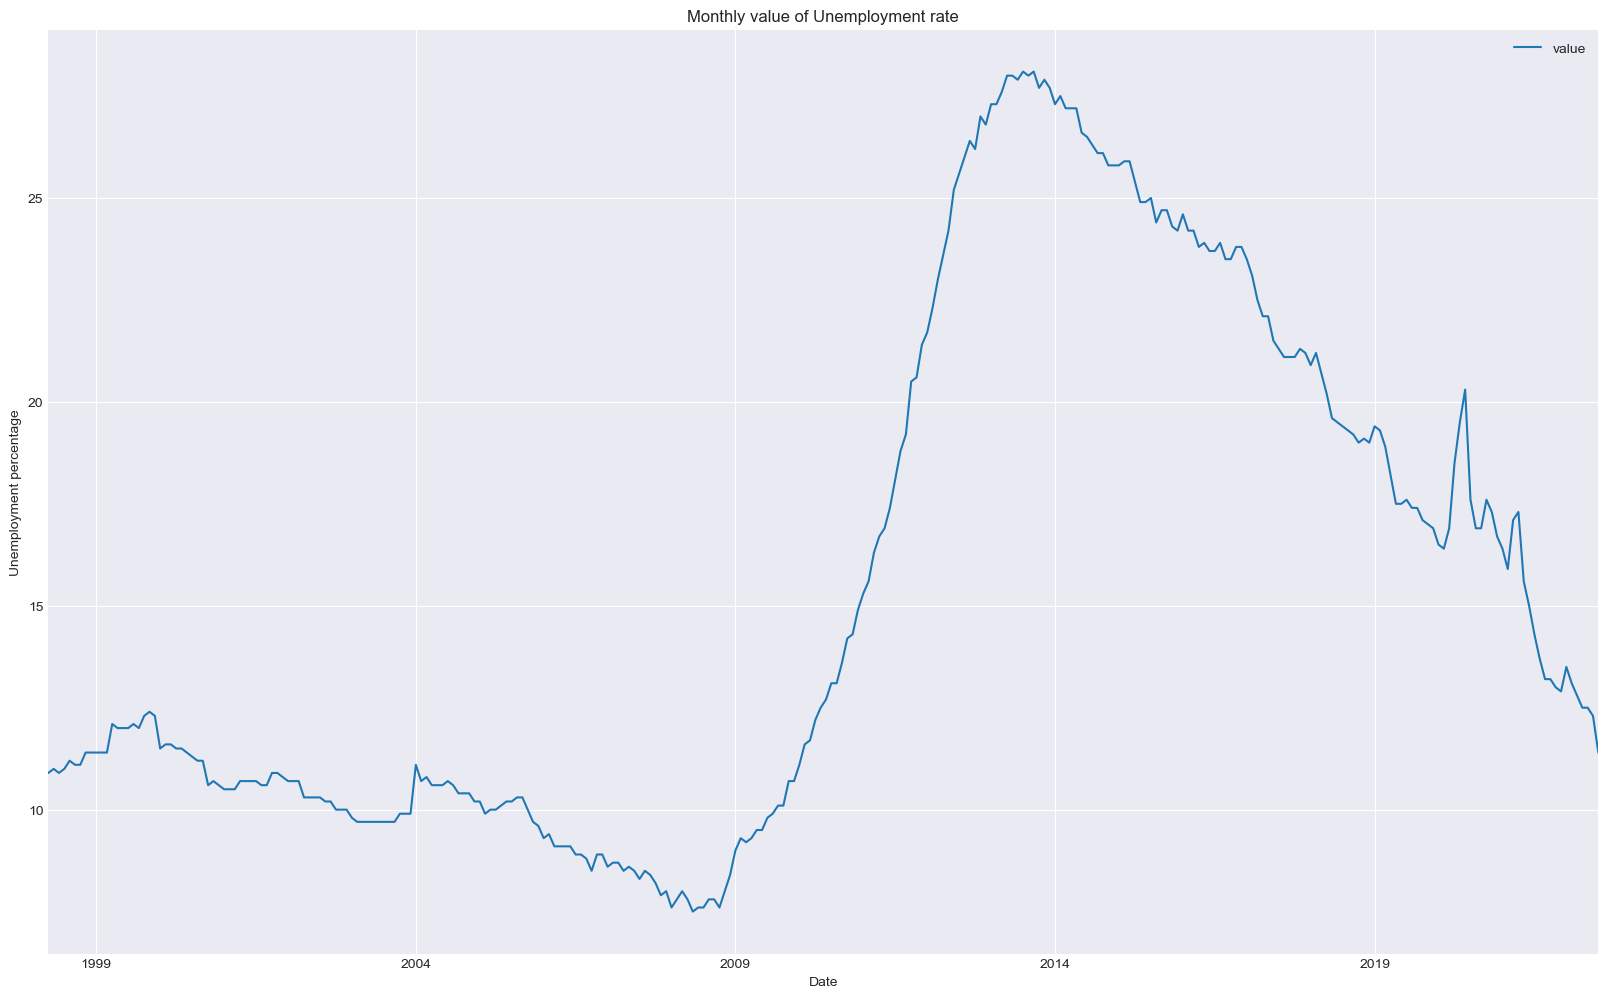

In [14]:
unemployment_rate_graph('EL', 'T', 'TOTAL', 'SA', 'PC_ACT')

          time  value
0   1998-04-01  489.0
1   1998-05-01  492.0
2   1998-06-01  491.0
3   1998-07-01  499.0
4   1998-08-01  506.0
..         ...    ...
287 2022-03-01  608.0
288 2022-04-01  589.0
289 2022-05-01  591.0
290 2022-06-01  579.0
291 2022-07-01  530.0

[292 rows x 2 columns]


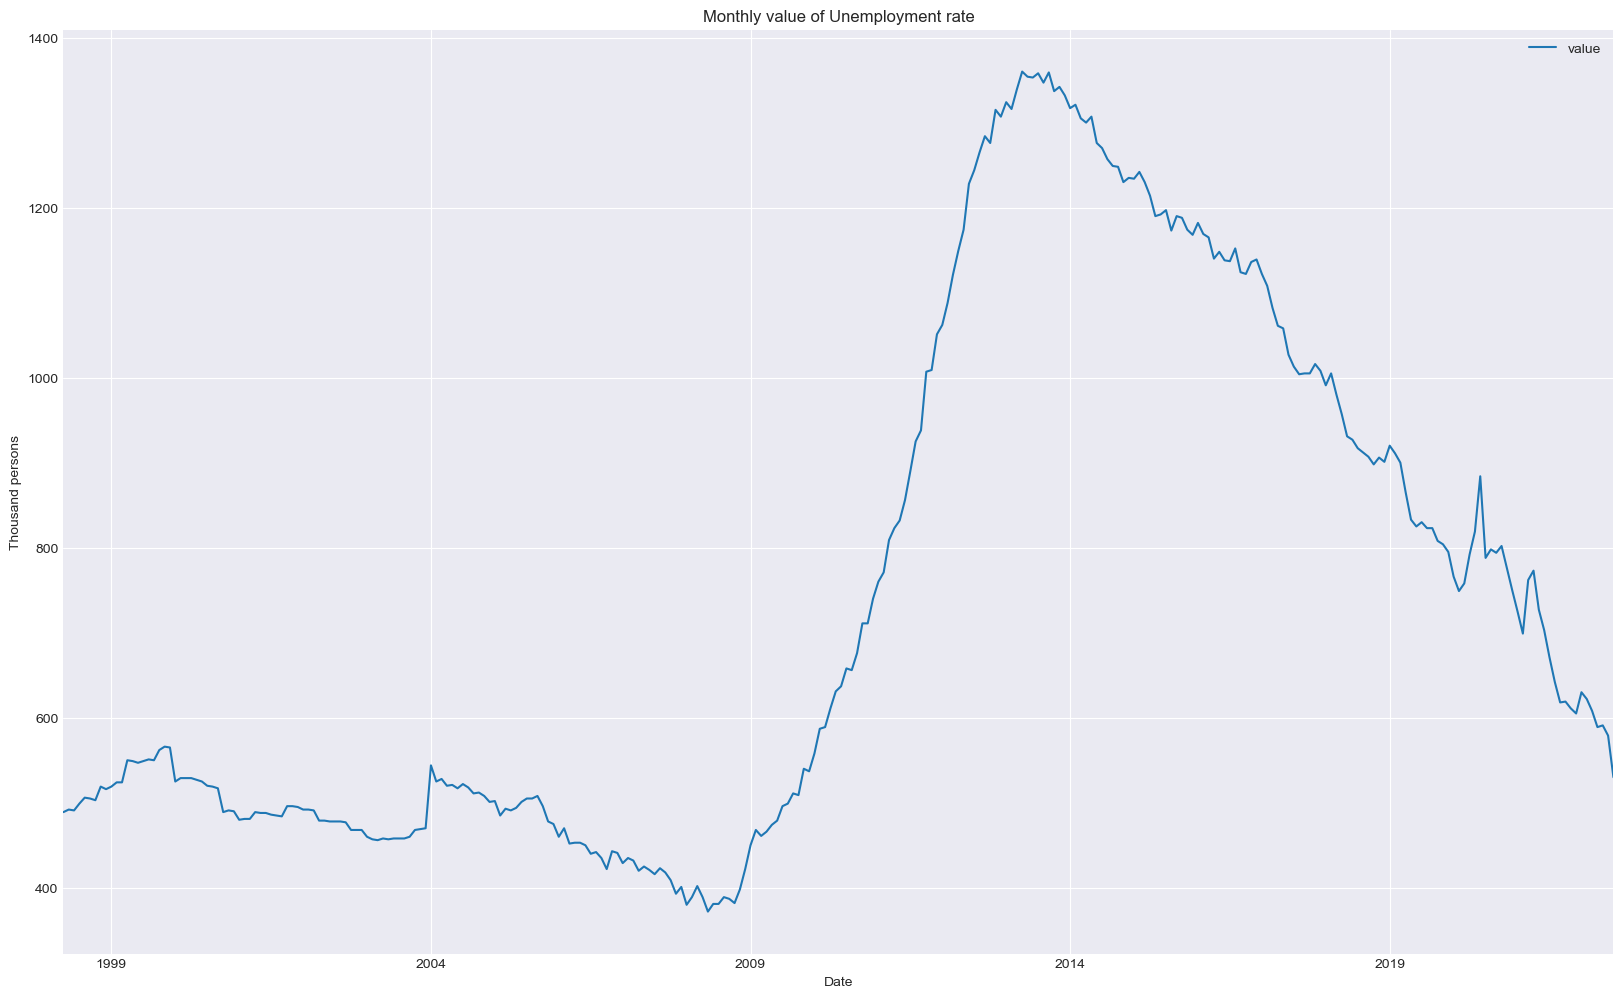

In [15]:
unemployment_rate_graph('EL', 'T', 'TOTAL', 'SA', 'THS_PER')

Υπάρχει ραγδαία αύξηση από τα τέλη του 2008 και μετά, κυρίως λόγο της οικονομικής κρίσης. Από τα τέλη του 2013 και μετά, υπάρχει μια συνεχής πτώση, με εξαίρεση την περίοδο της πρώτης και δεύτερης καραντίνας. 